# **Random Forest**

In [4]:
### 사용할 라이브러리
import pandas as pd ### 데이터 분석을 하기 위한 파이썬 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 데이터 전처리

In [5]:
df=pd.read_csv("/content/drive/MyDrive/mosquito_final_air_data.csv")

In [6]:
df= df.drop(['날짜','요일','모기 활동 지수(수변부)','모기 발생 단계(수변부)','모기 발생 수준(수변부)','모기 발생 난이도(수변부)',
 '모기 활동 지수(주거지)','모기 발생 단계(주거지)','모기 발생 수준(주거지)','모기 발생 난이도(주거지)',
 '모기 활동 지수(공원)','모기 발생 단계(공원)','모기 발생 수준(공원)','모기 발생 난이도(공원)',
 '포집량','모기','기타','모기 발생 단계(서울시 평균)','모기 발생 수준(서울시 평균)',
 '모기 발생 난이도(서울시 평균)','지점','지점명','Unnamed: 0'],axis=1)

In [7]:
#컬럼명 수정
df.rename(columns={
 '평균 기온(℃)':'AT', #Average temperature
 '최저 기온(℃)':'LT', #Lowest temperature
 '최고 기온(℃)':'MT', #Maximum temperature
 '모기 활동 지수(서울시 평균)':'MAI', #Mosquito activity index
 '평균 풍속(m/s)':'AWS', #average wind speed
 '평균 전운량(1/10)':'AOE', #Average amount of electricity
 '평균 지면온도(°C)':'AGT', #average ground temperature
 '평균 5cm 지중온도(°C)':'5UT',#5cm average underground temperature
 '0.5m 지중온도(°C)':'0.5UT',#0.5 m underground temperature
 'Month':'Month',
 '일강수량(mm)':'DP', #daily precipitation
 '평균 상대습도(%)':'ARH', #Average relative humidity
 '평균 증기압(hPa)':'AVP',#average vapor pressure
 '평균 현지기압(hPa)':'MLAP', #mean local atmospheric pressure
 '평균 해면기압(hPa)':'ASSP', #average sea surface pressure
 '합계 일사량(MJ/m2)':'TSR', #total solar radiation
 '미세먼지(㎍/㎥)':'FD',#Fine dust
 '초미세먼지(㎍/㎥)':'UFD', #Ultra fine dust
 '이산화질소농도(ppm)':'NDC', #Nitrogen dioxide concentration
 '일산화탄소농도(ppm)':'CMC', #carbon monoxide concentration
 '아황산가스농도(ppm)':'SDC'#Sulfur dioxide concentration
 },inplace=True)


In [8]:
#기온의 값은 기상청에서 찾은 값으로 채움
df['LT'] = df['LT'].fillna(27.2)
df['MT'] = df['MT'].fillna(23.4)
#대기 데이터의 null값은 많지 않으므로 dropna
df = df.dropna()
df.isnull().sum()

,0
AT,0
LT,0
MT,0
MAI,0
AWS,0
AOE,0
AGT,0
5UT,0
0.5UT,0
Month,0


In [9]:
numerical_columns = ['AT', 'LT', 'MT', 'AWS', 'AOE','AGT', '5UT', '0.5UT', 'Month', 'DP',
 'ARH', 'AVP', 'MLAP', 'ASSP','TSR','FD', 'UFD','NDC','CMC','SDC']

#### 모델링

In [12]:
# 데이터 분리
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
# split dataset into training & test
X = df[numerical_columns]
y = df['MAI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(max_features=None, n_estimators = 200, random_state = 300)
# 모델 학습
rf_regressor.fit(X_train, y_train)
# 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(X_test)
# 평가 메트릭 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 10741.41462320734
Root Mean Squared Error: 103.64079613360435
R-squared: 0.8272047679014157


In [13]:
# 랜덤 포레스트 회귀 모델 생성
rf = RandomForestRegressor()
# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
 'n_estimators': [100, 200, 300],
 'random_state': [100, 200, 300],
 'max_features': ['None', 'sqrt'],
}
# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# 최적의 모델 및 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 300}
Best Score: 0.6861555221732145


In [16]:
# split dataset into training & test
X = df[numerical_columns]
y = df['MAI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(max_features = None, n_estimators = 200, random_state = 100)
# 모델 학습
rf_regressor.fit(X_train, y_train)
# 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(X_test)
# 평가 메트릭 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 10371.846510665671
Root Mean Squared Error: 101.84226289053908
R-squared: 0.8331499445865147


해설: 배깅 기법도 써보았지만 81%의 정확도로 위의 기법 선택

AT: 0.015108451489679651
LT: 0.03221754330842555
MT: 0.012201325041709284
AWS: 0.01784452338943804
AOE: 0.01232414458306514
AGT: 0.012342896467774095
5UT: 0.03577903524833978
0.5UT: 0.45684390088933247
Month: 0.044415951429873916
DP: 0.014224363017855303
ARH: 0.027212660023559637
AVP: 0.025689496443546605
MLAP: 0.013211125400827119
ASSP: 0.011258050382835576
TSR: 0.01415527253080594
FD: 0.016570364311349502
UFD: 0.01380613324347283
NDC: 0.0791556662574599
CMC: 0.005330645203307471
SDC: 0.1403084513373421


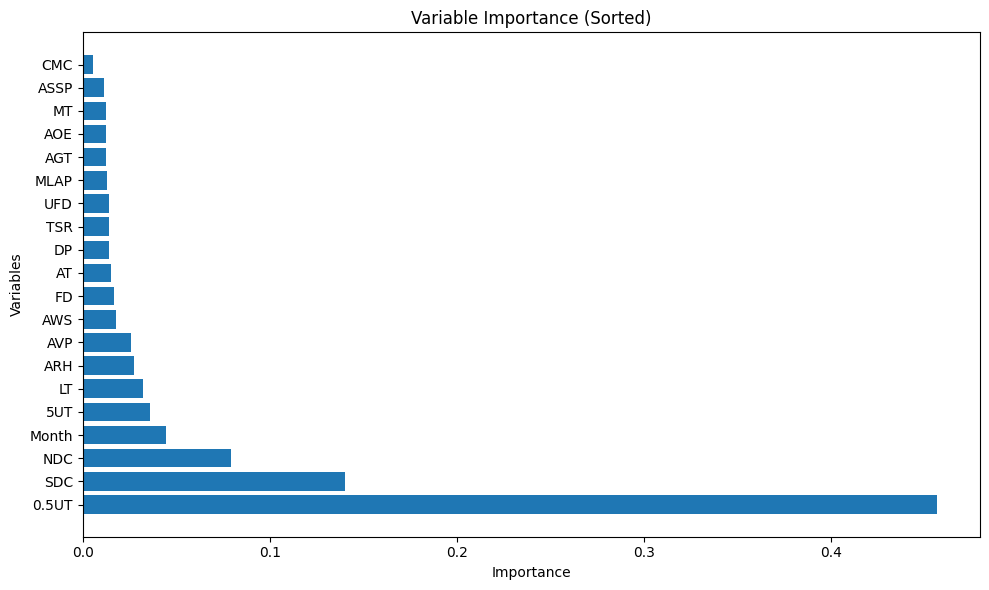

In [17]:
# 변수 중요도 추출
importances = rf_regressor.feature_importances_
# 변수 중요도 출력
for features, importance in zip(X.columns, importances):
 print(f"{features}: {importance}")
# 변수명과 중요도를 데이터프레임으로 변환
df_importance = pd.DataFrame({'Variable': X.columns, 'Importance': importances})
# 중요도 큰 순서대로 정렬
df_importance_sorted = df_importance.sort_values('Importance', ascending=False)
# 변수 중요도를 크기 순으로 나열한 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(df_importance_sorted['Variable'], df_importance_sorted['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('Variable Importance (Sorted)')
plt.tight_layout()
plt.show()